<a href="https://colab.research.google.com/github/MPrasanna14/prasanna_INFO5731_Fall2023/blob/main/PrasannaMalreddy_INFO5731_Assignment_Three_fall2023_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [2]:
# Write your code here
import pandas as pd
import numpy as np

df = pd.read_csv('/content/movie_reviews (1).csv')

df



,Title,Username,Review Date,Review Text
0,Enjoyable but empty,masonsaul,7-Jul-22,Thor: Love and Thunder does attempt to explore...
1,"Worst MCU yet, things keep getting worse...",blott2319-1,20-Jul-22,I think most people thought it was a big mista...
2,Christian bales great performance wasted in a ...,rockingruby,7-Jul-22,"Christian Bale is great, Russell Crowe has a g..."
3,Very very disappointed,ryrymadrid,9-Jul-22,"I'm a huge marvel fanboy, and hardly ever have..."
4,Nearly a 2-hour SNL skit,TakeUpReel,14-Jul-22,"...Well, maybe not SNL-esque throughout the fu..."
...,...,...,...,...
9995,Empty. Annoying.,paularjyarishi,13-Jul-22,String of jokes and gags. Bland fight sequence...
9996,They destroyed Thor,akashdeb-94800,8-Jul-22,"I never wrote negative review, but now it dese..."
9997,What a joke...,drumskostas,6-May-23,What the hell did I just watch....You might th...
9998,So Everyone's a god now?,duggies70,31-May-23,I loved the start. The back story of Gorr was ...


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import numpy as np
from textblob import TextBlob

In [6]:
# Function to get n-grams
def get_ngrams(corpus, n):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq
# Function to calculate bigram probabilities
def calculate_bigram_probabilities(corpus):
    unigrams = [word for review in corpus for word in review.split()]
    unigram_counts = Counter(unigrams)
    vec = CountVectorizer(ngram_range=(2, 2))
    bag_of_words = vec.fit_transform(corpus)
    bigram_counts = bag_of_words.sum(axis=0)
    bigrams = vec.get_feature_names_out()
    bigram_probabilities = {bigram: count / unigram_counts[bigram.split()[0]]
                            for bigram, count in zip(bigrams, bigram_counts.A1)}
    return bigram_probabilities

# Function to extract noun phrases and calculate relative probabilities
def noun_phrase_probabilities(corpus):
    # Extract noun phrases
    noun_phrases = []
    for review in corpus:
        blob = TextBlob(review)
        noun_phrases += blob.noun_phrases

    # Count noun phrases frequencies
    noun_phrase_freq = Counter(noun_phrases)
    max_freq = max(noun_phrase_freq.values())

    # Calculate relative probabilities
    noun_phrase_rel_prob = {phrase: freq / max_freq for phrase, freq in noun_phrase_freq.items()}

    return noun_phrase_rel_prob, noun_phrases

In [5]:
# (1) Count the frequency of all the trigrams (N=3)
trigram_frequencies = get_ngrams(df['Review Text'], 3)
trigram_frequencies

[('love and thunder', 5600),
 ('thor love and', 3600),
 ('in this movie', 2400),
 ('in the movie', 2400),
 ('christian bale is', 2000),
 ('the god butcher', 2000),
 ('to the point', 2000),
 ('and thunder is', 1600),
 ('of the movie', 1600),
 ('is about as', 1200),
 ('with thor love', 1200),
 ('is that it', 1200),
 ('many of the', 1200),
 ('gorr the god', 1200),
 ('this movie was', 1200),
 ('but the script', 1200),
 ('the screaming goats', 1200),
 ('so much of', 1200),
 ('of love and', 800),
 ('one of the', 800),
 ('could have been', 800),
 ('problem with thor', 800),
 ('that it is', 800),
 ('it is so', 800),
 ('in the mcu', 800),
 ('there are some', 800),
 ('of the other', 800),
 ('the handing off', 800),
 ('handing off of', 800),
 ('the guardians of', 800),
 ('guardians of the', 800),
 ('of the galaxy', 800),
 ('bale is great', 800),
 ('but this was', 800),
 ('one of my', 800),
 ('excited to see', 800),
 ('none of the', 800),
 ('of the jokes', 800),
 ('the movie but', 800),
 ('too oft

In [8]:
# (2) Calculate the probabilities for all the bigrams
bigram_probabilities = calculate_bigram_probabilities(df['Review Text'])
bigram_probabilities

<ipython-input-6-5589da0c8476>:17: RuntimeWarning: divide by zero encountered in long_scalars
  bigram_probabilities = {bigram: count / unigram_counts[bigram.split()[0]]


{'10 minutes': 1.0,
 '11 and': 0.5,
 '11 to': 0.5,
 '15 years': 1.0,
 '20 2022': 1.0,
 '20 times': 1.0,
 '2022 imax': inf,
 '374 take': inf,
 '40 of': inf,
 '4th joke': 0.5,
 '4th movie': 0.5,
 '60 seconds': 1.0,
 'abandoned asgard': 1.0,
 'about all': 0.16666666666666666,
 'about as': 0.25,
 'about forgettable': 0.08333333333333333,
 'about how': 0.08333333333333333,
 'about many': 0.08333333333333333,
 'about nordberg': 0.08333333333333333,
 'about superhero': 0.08333333333333333,
 'about the': 0.25,
 'above them': 1.0,
 'absolutely terrifying': 0.5,
 'absolutely unnecessary': 0.5,
 'absurd christian': 1.0,
 'absurd to': 1.0,
 'absurd understand': 1.0,
 'accepting of': 1.0,
 'act as': 1.0,
 'act but': 1.0,
 'acting but': 1.0,
 'acting is': 1.0,
 'action scenes': 1.0,
 'actor ever': 1.0,
 'actors deliver': 1.0,
 'actual spoof': 1.0,
 'actually butchered': 0.5,
 'actually hard': 0.5,
 'actually that': 0.5,
 'add the': inf,
 'added gor': 1.0,
 'afraid of': 1.0,
 'after an': 0.125,
 'aft

In [9]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
# (3) Extract all the noun phrases and calculate the relative probabilities
noun_phrase_rel_prob, all_noun_phrases = noun_phrase_probabilities(df['Review Text'])

# Create a dataframe to display the noun phrases and their probabilities in a table
# We will limit this to the first 100 reviews for display purposes
noun_phrase_table = pd.DataFrame(index=df['Review Text'][:100], columns=list(set(all_noun_phrases)))
for review in df['Review Text'][:100]:
    blob = TextBlob(review)
    review_noun_phrases = blob.noun_phrases
    for phrase in review_noun_phrases:
        noun_phrase_table.at[review, phrase] = noun_phrase_rel_prob.get(phrase, 0)

In [12]:
# Fill NaN with zeros
noun_phrase_table.fillna(0, inplace=True)

# Print the table
print(noun_phrase_table.head())

                                                    natalie portman  marvel  \
Review Text                                                                   
Thor: Love and Thunder does attempt to explore ...            0.025     0.0   
I think most people thought it was a big mistak...            0.000     0.0   
Christian Bale is great, Russell Crowe has a go...            0.000     0.0   
I'm a huge marvel fanboy, and hardly ever have ...            0.000     0.0   
...Well, maybe not SNL-esque throughout the ful...            0.000     0.2   

                                                    endless barrage  \
Review Text                                                           
Thor: Love and Thunder does attempt to explore ...              0.0   
I think most people thought it was a big mistak...              0.0   
Christian Bale is great, Russell Crowe has a go...              0.0   
I'm a huge marvel fanboy, and hardly ever have ...              0.0   
...Well, maybe not S

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [14]:
# Write your code here

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Review Text'])

In [15]:
# Define a query
query = "An Outstanding movie with a haunting performance and best character development"

# Transform the query to be compatible with the documents' tf-idf matrix
query_vector = tfidf_vectorizer.transform([query])

# Compute the cosine similarity between the query vector and all the document vectors
cosine_similarities = cosine_similarity(query_vector, tfidf_matrix)

# Rank the documents from the most similar to the least
document_ranking = cosine_similarities.argsort().flatten()[::-1]

# Display the top 5 documents with the highest cosine similarity scores
top_documents = df.iloc[document_ranking[:5]]

print(top_documents)

               Title     Username Review Date  \
1097  What a joke...  drumskostas    6-May-23   
2797  What a joke...  drumskostas    6-May-23   
1022  What a joke...  drumskostas    6-May-23   
9247  What a joke...  drumskostas    6-May-23   
2772  What a joke...  drumskostas    6-May-23   

                                            Review Text  
1097  What the hell did I just watch....You might th...  
2797  What the hell did I just watch....You might th...  
1022  What the hell did I just watch....You might th...  
9247  What the hell did I just watch....You might th...  
2772  What the hell did I just watch....You might th...  


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [16]:
# Write your code here
import pandas as pd
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# This is a simple whitespace tokenizer, you might want to consider a more complex one
sentences = [review.split() for review in df['Review Text']]


In [17]:
# Train a Word2Vec model
model = Word2Vec(sentences, vector_size=300, window=5, min_count=1, workers=4)

# Save the model for later use
model.save("word2vec_movie_reviews.model")

In [18]:
# Extract the word vectors
word_vectors = model.wv.vectors
words = model.wv.index_to_key

# Use t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)

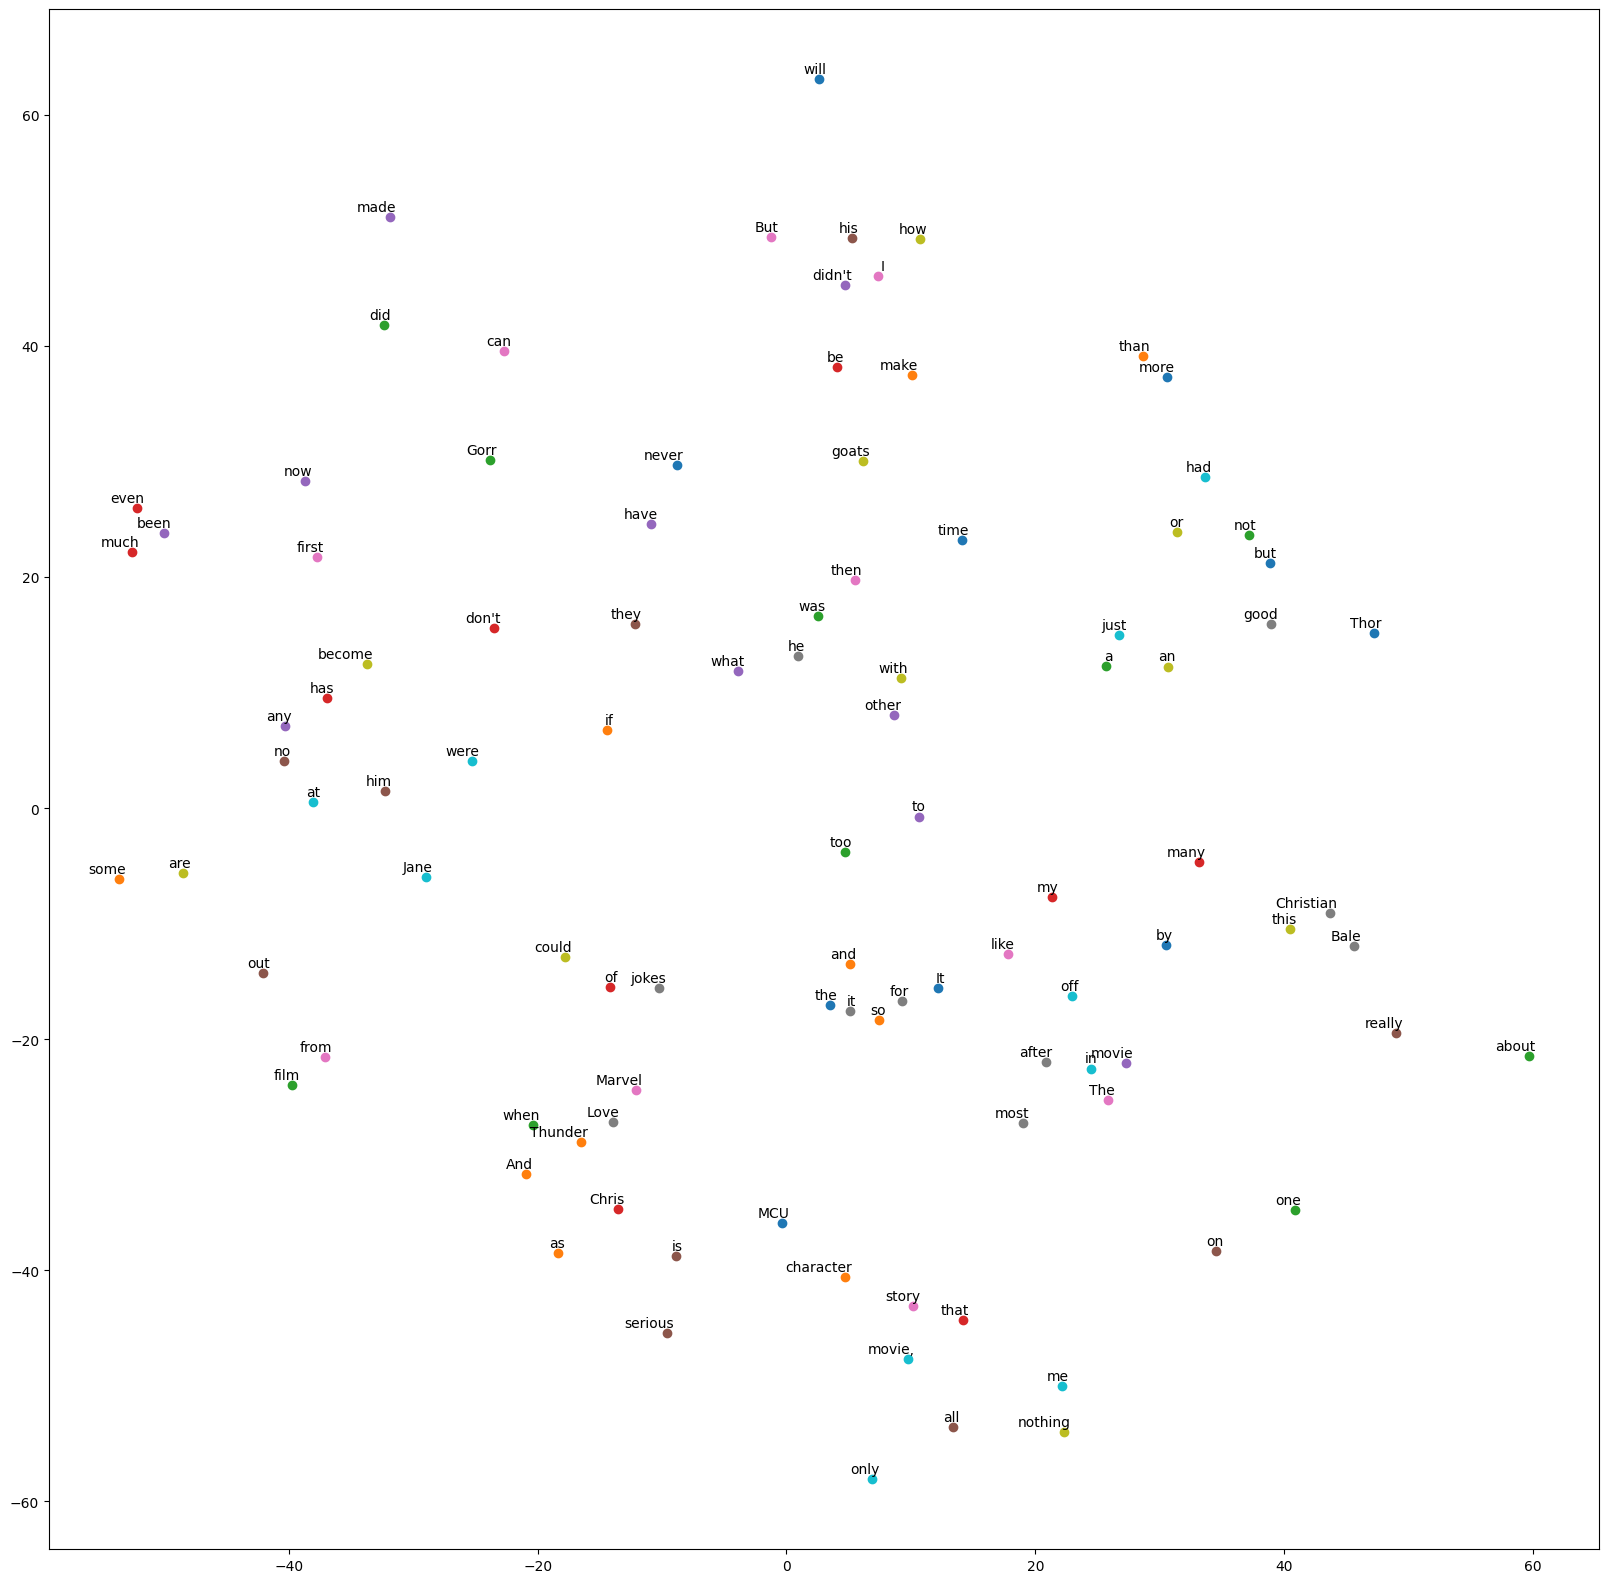

In [19]:
# Plot the results
plt.figure(figsize=(20, 20))
for i, word in enumerate(words[:100]): # Visualize the first 100 words
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file
https://github.com/MPrasanna14/prasanna_INFO5731_Fall2023/blob/main/MovieReview_Evaluation.csv
https://github.com/MPrasanna14/prasanna_INFO5731_Fall2023/blob/main/MovieReview_Train.csv